In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

In [2]:
length = .1 # in seconds

wbs = ss.WidebandSignal(t_sec=length, num_bands=10, num_steps=10)

mat = np.array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100, -100, -100, -100,   10, -100],
                [-100,    0, -100,    5, -100, -100, -100, -100,   10, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100,   10, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100,   10, -100,    5, -100, -100],
                [-100,    0, -100,    5, -100, -100, -100,    5, -100, -100],
                [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]])

sig, sample_freq = wbs.get_signal(mat)

wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(dB=10.)

assert wbs.num_samples == wgn.num_samples
num_samples = wbs.num_samples

both = sig + noise

Created WidebandSignal with 1.0 MHz total bandwidth and 10000 samples per step


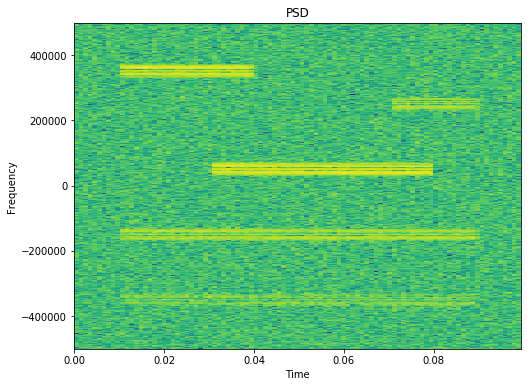

In [3]:
plt.figure(figsize=(8, 6))
plt.specgram(both,
             NFFT=1024,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', 1024))
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

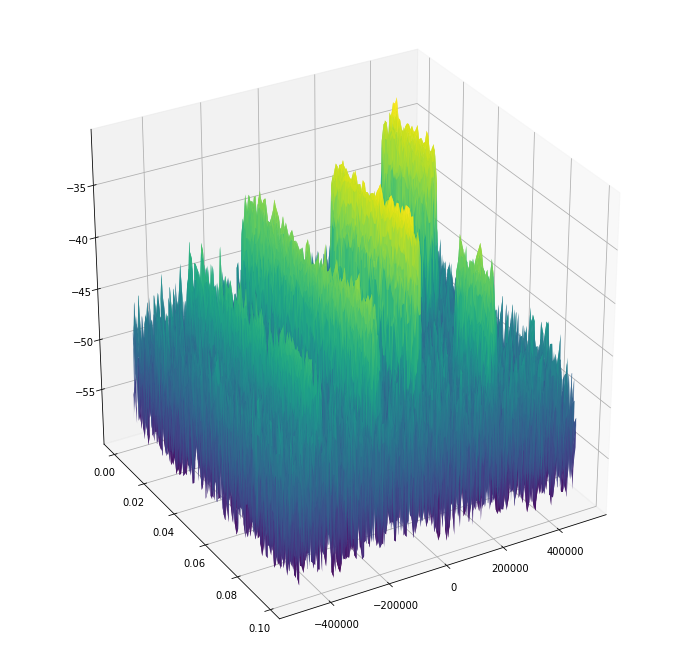

In [4]:
ss.plot3d(sig=both,
          f_sample=sample_freq,
          window='flattop',
          nfft=1024,
          clip=-60,
          smooth=.5,
          crop=None,
          elev=30,
          azim=60)